# Grove Light Sensor 1.1

This example shows how to use the [Grove Light Sensor v1.1](http://www.seeedstudio.com/wiki/Grove_-_Light_Sensor). You will also see how to plot a graph using matplotlib.

The Grove Light Sensor produces an analog signal which requires an ADC.

The Grove Light Sensor, Pynq Grove Adapter, and Grove I2C ADC are used for this example. 

When the ambient light intensity increases, the resistance of the LDR or Photoresistor will decrease. This means that the output signal from this module will be HIGH in bright light, and LOW in the dark. Values for the sensor ranges from ~5.0 (bright) to >35.0 (dark).

### 1. Load overlay.

In [8]:
# Ensure base overlay is loaded
from pynq import Overlay
Overlay("base.bit").download()

### 2. Read single luminance value
This example shows on how to read from the Grove Light sensor which is connected to the ADC.

In [72]:
from pynq.iop import Grove_Light

# Instantiate Grove LED Bar on PMODA and on Pmod2Grove G1
# PMODA = 1, PMODB = 2, Arduino = 3
# The ADC can be connected to the Pynq Grove Adapter on J3 = [7,3], J4 = [6,2]
# The LEDbar can be connected to G1-7 on the Pynq Shield:
# G1 = [2,3], G2 = [3,4], G3 = [4,5], G4 = [6,7], G5 = [8,9], G6 = [10,11], G7 = [12,13]
lgt = Grove_Light(1, [6,2])
sensor_val = lgt.read()
print(sensor_val)
#print(float("{0:.2f}".format(sensor_val)))

5.75


### 3. Plot the light intensity over time
This example reads multiple values over a 10 second period. 

To change the light intensity, cover and uncover the light sensor. In typical ambinet light, there is no need to provide an external light source, as the sensor is already reading at full scale. 

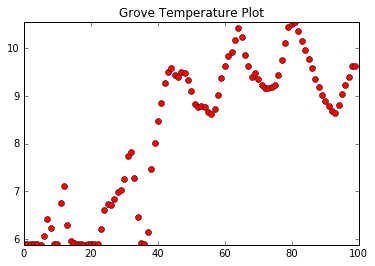

In [75]:
import time

%matplotlib inline
import matplotlib.pyplot as plt

lgt.set_log_interval_ms(100)
lgt.start_log()
time.sleep(10) # Change input during this time
r_log = lgt.get_log()

plt.plot(range(len(r_log)), r_log, 'ro')
plt.title('Grove Temperature Plot')
min_r_log = min(r_log)
max_r_log = max(r_log)
plt.axis([0, len(r_log), min_r_log, max_r_log])
plt.show()